# LINEAR REGRESSION

## PART 1: INTRODUCTION

- **Classification problem:** supervised learning problem with a categorical response
- **Regression problem**: supervised learning problem with a continuous response
- **Linear regression:** machine learning model that can be used for regression problems

__WHY ARE WE LEARNING LINEAR REGRESSION?__
- widely used
- runs fast
- easy to use (no tuning is required)
- highly interpretable
- basis for many other methods

__LESSON GOALS__

- Conceptual understanding of linear regression and how it "works"
- Familiarity with key terminology
- Ability to apply linear regression to a machine learning problem using scikit-learn
- Ability to interpret model coefficients
- Familiarity with different approaches for feature selection
- Understanding of three different evaluation metrics for regression
- Understanding of linear regression's strengths and weaknesses

__LIBRARIES__

- [scikit-learn](http://scikit-learn.org/stable/): "machine learning in Python"
     - significant functionality for general purpose machine learning

__REFERENCES__

- [PARAMETRIC vs NON-PARAMETRIC MODELS](https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/)
- Linear Regression models are parametric. 


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

__SETUP VISUALIZATION__

In [2]:
! pip install seaborn

In [2]:
%magic

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## PART 2: READING THE ADVERTISING DATA 

In [4]:
# read data into a DataFrame
ads = pd.read_csv('../data/advertising.csv', index_col=0)
ads.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
ads.shape

(200, 4)

## What are the observations?
- Each observation represents **one market** (200 markets in the dataset)

## What are the features?
- **TV:** advertising dollars spent on TV for a single product (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

## What is the response?
- **Sales:** sales of a single product in a given market (in thousands of widgets)

## Questions about the data
You are asked by the company: On the basis of this data, how should we spend our advertising money in the future?
You come up with more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?



## PART 3: VISUALIZATION

### VISUALIZING THE DATA IN SEABORN
* Use a **scatter plot** to visualize the relationship between the features and the response.

/Users/alexseong/miniconda3/envs/enterpriseml/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


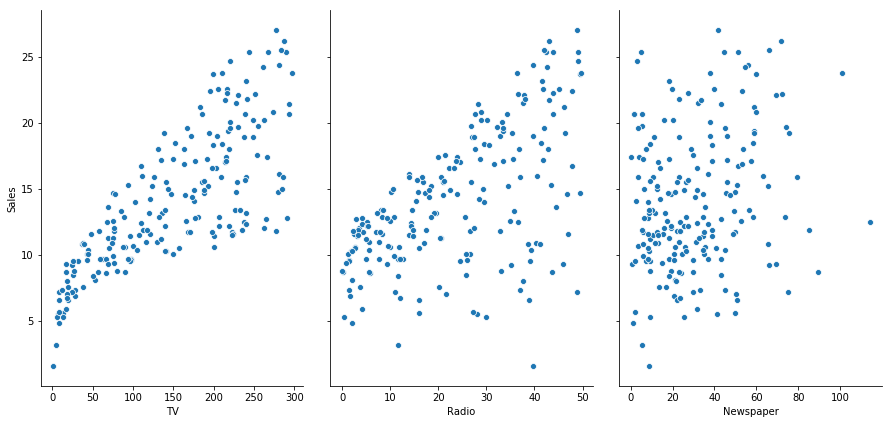

In [6]:
# scatter plot in Seaborn
sns.pairplot(ads, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=6, aspect=0.7)

### Include a "regression line"

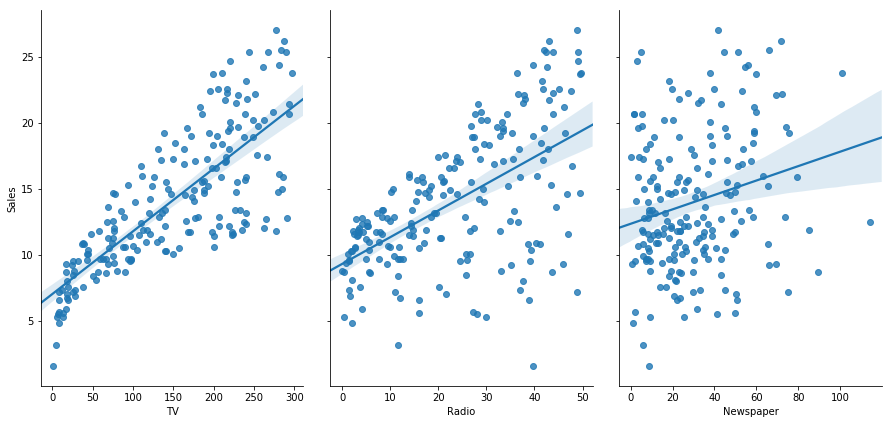

In [9]:
sns.pairplot(ads, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=6, aspect=0.7, kind='reg')
#sns.pairplot(ads, x_vars=['Radio'], y_vars='Newspaper', size=6, aspect=0.7, kind='reg')

### USA A SCATTER MATRIX TO VISUALIZE THE RELATIONSHIP BETWEEN ALL NUMERICAL VARIABLES

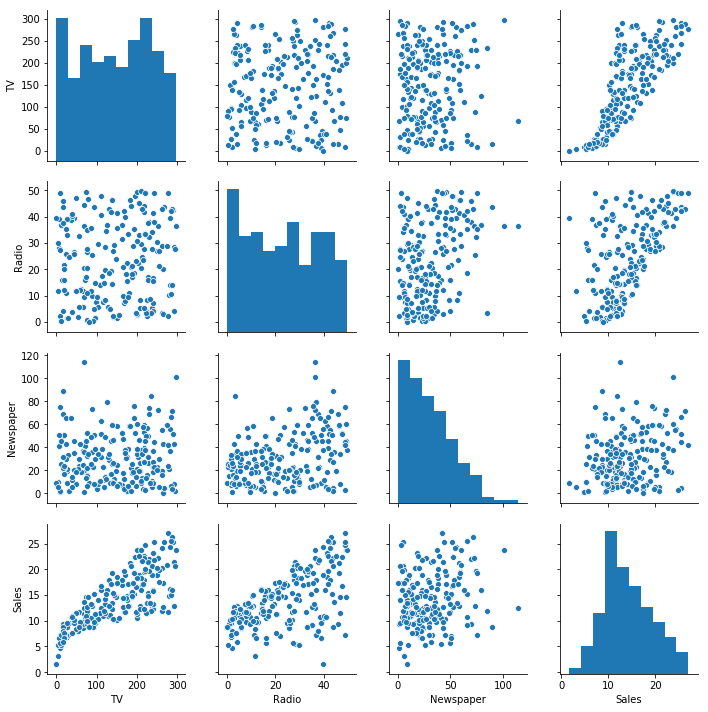

In [10]:
# scatter matrix in Seaborn
sns.pairplot(ads)

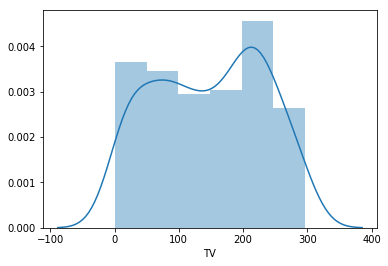

In [11]:
sns.distplot(ads.TV)

In [15]:
Tvless125 =  ads[ads.TV < 125]
Tvgrt125 = ads[ads.TV > 125]

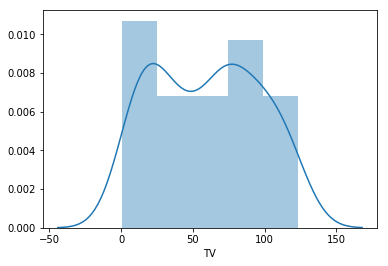

In [16]:
sns.distplot(Tvless125.TV)

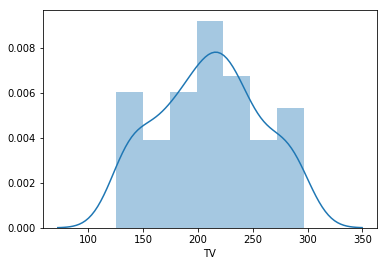

In [17]:
sns.distplot(Tvgrt125.TV)

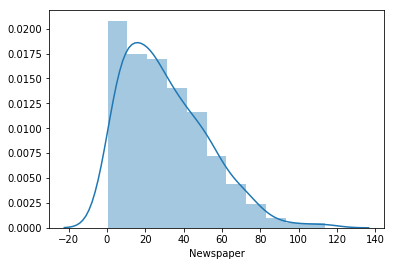

In [18]:
sns.distplot(ads.Newspaper)

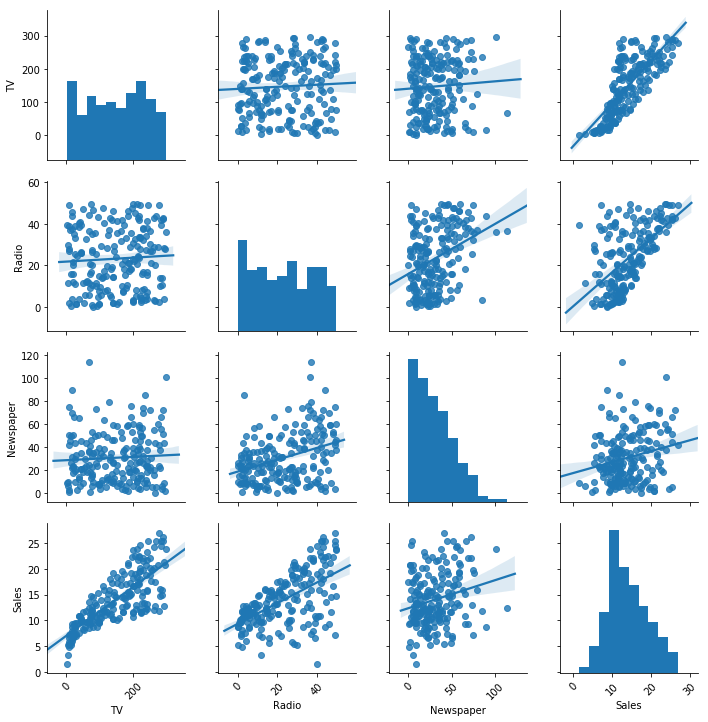

In [19]:
# scatter matrix in seaborn
g = sns.pairplot(ads[["TV", "Radio", "Newspaper", "Sales"]], diag_kind="hist", kind="reg")
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

### USE A **CORRELATION MATRIX** TO VISUALIZE THE CORRELATION BETWEEN ALL NUMERCIAL VARIABLES 


The correlation matrix is a basic, everyday instrument that often can tell the whole story quickly. The correlation is a number between -1 and +1 that measures how close the relationship between two variables is to being linear (i.e., forming a straight line if the two were graphed against each other). Correlation = +1 means variables are perfectly positively correlated (they go up and down in perfect synchronization; e.g., dollars of sales and sales tax); -1 means perfect negative correlation (one goes up and the other goes down; e.g., items sold and inventory); values close to 0 mean either no relation or the relation isn't linear (e.g., annual rainfall and average shoe size). Correlation is independent of scale; measuring one variable in millions and the other in millionths won't affect it. A correlation matrix is simply a grid of the correlations among all the variables, like this:

<img src='./images/corr_matrix.jpeg' />

This invented example is for a job satisfaction poll. The numbers are invented but typical.

Imagine each question asks for a reply on a scale of 1 to 5, with 5 being "Yes! Yes! Yes!" and 1 being "No way! Never!" and that the questions are:

- __Q1__: Are you looking for another job?
- __Q2__: Does this job stress you out?
- __Q3__: Is your boss difficult to work with?
- __Q4__: Do you feel appreciated?
- __Q5__: Is your workplace comfortable?

Because the correlation of X to Y is always equal to the correlation of Y to X, and a variable is always perfectly correlated (correlation = 1.00) with itself, we can put the correlation matrix into a reduced form, with duplicate values pulled out:

<img src='./images/corr_matrix2.jpeg' />

Now, what can we learn from this?

The sign of the correlation tells us whether the two variables are positively (more X means more Y) or negatively (more X means less Y) related. The absolute value (difference from 0 without regard to sign) tells us how strong the relationship is, and depends on issues about which you'll need to talk to the analyst. Typically for a case like this:

<img src='./images/corr_matrix3.jpeg' />

If we substitute those interpretations in for the values in the reduced form, now we have:

<img src='./images/corr_matrix4.jpeg' />

And here's what we can see:

__Strong positive correlations__: Q3 with Q2 and Q1. These translate into: "Jerky bosses are strongly associated with feeling stressed and looking for another job." Notice that this is an interpretation; remember, as I wrote about last time, correlation does not require causality. The numbers could just as easily be read to mean that stressed-out, job-hopping employees cause bosses to become jerks. But common sense tends to lean to my interpretation.

__Strong negative correlations__: Q4 with Q1 and Q3. There's a close, opposite relation between feeling appreciated (Q4) and planning to leave (Q1) and the jerkiness of the boss (Q3).

__Strong negative correlation__: Q5 with Q2. There's a sharp tradeoff: More comfort means less stress (or vice versa, but it seems more likely that a nice environment is relieving worker stress rather than that calm, happy workers are enjoying shabby environments).

__Moderate positive__: Q1 and Q2; moderate negative: Q1 and Q5. Stress and comfort have sizable but not overwhelming effects on the decision to look for another job.

The results here will not come as a surprise to anyone in business: The unappreciative jerk of a boss is more likely to stress/drive you out than anything else, and a comfy office, cubicle, or workstation helps to reduce stress. Like the correlation matrix itself, it's mostly an expression of common sense.

But if you're the manager or analyst reading the correlation matrix, you can look at it to learn something about where your priorities should be:

1. Retrain or fire the difficult managers; if there's time and money left after that, maybe...
2. Get nicer furniture or enhance the break room.

You should try to act on the strong correlations first because they are the most likely to pay off. Getting a new coffeemaker or holding an awards ceremony might be easier and less stressful for you than tackling the difficult manager, but the correlation matrix is clearly telling you that the big rewards in employee retention will come when you bring those rude tyrants into line.

In [20]:
# compute correlation matrix
ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### DISPLAY CORRELATION MATRIX IN A SEABORN USING A HEATMAP

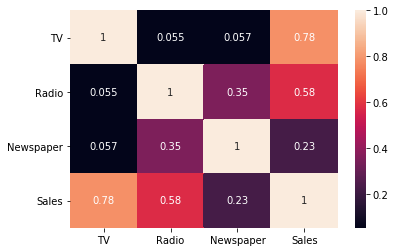

In [21]:
sns.heatmap(ads.corr(), annot=True)

## PART 3: SIMPLE LINEAR REGRESSION

[The Mathematics of Linear Regression](https://en.m.wikipedia.org/wiki/Linear_least_squares_(mathematics))

Simple linear regression is an approach for predicting a **continuous response** using a **single feature**. It takes the following form:
 $y = \beta_0 + \beta_1x$
 - $y$ is the response
 - $x$ is the feature
 - $\beta_0$ is the intercept
 - $\beta_1$ is the coefficient for x

 $\beta_0$ and $\beta_1$ are called the **model coefficients**:

 - We must "learn" the values of these coefficients to create our model.
 - And once we've learned these coefficients, we can use the model to predict Sales.

### Estimating ("learning") model coefficients
 - Coefficients are estimated during the model fitting process using the **least squares criterion**.
 - We are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").

### Estimating Coefficients diagram
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

![Estimating Coefficients](./images/estimating_coefficients.png)

### Slope Intercept diagram
![Slope Intercept](./images/slope_intercept.png)

### How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

### LET'S ESTIMATE THE MODEL COEFFICIENTS FOR THE ADVERTISING DATA USING SCIKIT-LEARN

In [22]:
# create X and y
feature_cols = ['TV']
X = ads[feature_cols]
y = ads.Sales

In [23]:
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

/Users/alexseong/miniconda3/envs/enterpriseml/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

7.032593549127694
[0.04753664]


### INTERPRETING MODEL COEFFICIENTS

### How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.0475 "unit" increase in Sales.
- Meaning: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.5 widgets.
- This is not a statement of **causation**.

### If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Using the model for prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?
$$y = \beta_0 + \beta_1x$$
$$y = 7.0326 + 0.0475 \times 50$$

### manually calculate the prediction
7.0326 + 0.0475*50

### PREDICT USING SCIKIT-LEARN

In [25]:
ads.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [26]:
# predict for a new observation
linreg.predict([[50]])

array([9.40942557])

* Thus, we would predict Sales of **9,409 widgets** in that market.

### QUESTION: Does the scale of the features matter?
* Let's say that TV was measured in dollars, rather than thousands of dollars. How would that affect the model?

In [27]:
# create X and y
feature_cols = ['TV']
X = ads[feature_cols]
y = ads.Sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

7.032593549127694
[0.04753664]


###  How do we interpret the TV_dollars coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.0000475 "unit" increase in Sales.
- Meaning: An additional dollar spent on TV ads is **associated with** an increase in sales of 0.0475 widgets.
- Meaning: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.5 widgets.

In [28]:
# predict for a new observation
linreg.predict([[50000]])

array([2383.8646152])

The scale of the features is **irrelevant** for linear regression models, since it will only affect the scale of the coefficients, and we simply change our interpretation of the coefficients.


## PART 4: A DEEPER UNDERSTANDING

### Bias and variance
#### Linear regression is a low variance/high bias model:
- **Low variance:** Under repeated sampling from the underlying population, the line will stay roughly in the same place
- **High bias:** The line will rarely fit the data well

### How well does the model fit the data?

#### R-squared:
- A common way to evaluate the overall fit of a linear model
- Defined as the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model
- Also defined as the reduction in error over the **null model**, which is the model that simply predicts the mean of the observed response
- Between 0 and 1, and higher is better

## HERE'S AN EXAMPLE OF WHAT R-SQUARED "LOOKS LIKE":
#### Let's calculate the R-squared value for our simple linear model:

In [29]:
X

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
6,8.7
7,57.5
8,120.2
9,8.6
10,199.8


In [30]:
# calculate the R-squared value for the model
y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.611875050850071

In [31]:
y_pred

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [32]:
# create X and y
feature_cols = ['Radio']
X = ads[feature_cols]
y = ads.Sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.33203245544529525

In [33]:
# create X and y
feature_cols = ['Newspaper']
X = ads[feature_cols]
y = ads.Sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.05212044544430516

In [34]:
# create X and y
feature_cols = ['TV', 'Newspaper', 'Radio']
X = ads[feature_cols]
y = ads.Sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.8972106381789522

- The threshold for a **"good" R-squared value** is highly dependent on the particular domain.
- R-squared is more useful as a tool for **comparing models**.

## PART 5: MULTIPLE LINEAR REGRESSION

### Simple linear regression can easily be extended to include multiple features, which is called **multiple linear regression**:
#### $y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

### Each $x$ represents a different feature, and each feature has its own coefficient:
#### $y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [35]:
ads['Ratio'] = (ads['TV'] + ads['Radio'] + ads['Newspaper']) / ads.shape[0]

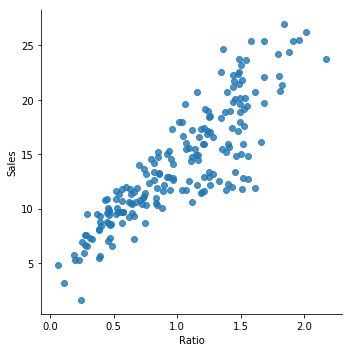

In [36]:
sns.lmplot("Ratio", "Sales", data=ads, fit_reg=False)

In [37]:
ads.head()

,TV,Radio,Newspaper,Sales,Ratio
1,230.1,37.8,69.2,22.1,1.6855
2,44.5,39.3,45.1,10.4,0.6445
3,17.2,45.9,69.3,9.3,0.6620
4,151.5,41.3,58.5,18.5,1.2565
5,180.8,10.8,58.4,12.9,1.2500


In [38]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']

X = ads[feature_cols]
y = ads.Sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

# pair the feature names with the coefficients
dict(zip(feature_cols, linreg.coef_))

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


{'TV': 0.045764645455397615,
 'Radio': 0.1885300169182046,
 'Newspaper': -0.001037493042476266}

In [39]:
y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.8972106381789522

- For a given amount of Radio and Newspaper spending, an increase of $1000 in **TV** spending is associated with an **increase in Sales of 45.8 widgets**.

- For a given amount of TV and Newspaper spending, an increase of $1000 in **Radio** spending is associated with an **increase in Sales of 188.5 widgets**.

- For a given amount of TV and Radio spending, an increase of $1000 in **Newspaper** spending is associated with an **decrease in Sales of 1.0 widgets**. How could that be?

In [40]:
linreg.intercept_ + (linreg.coef_[0] * 1000) + (linreg.coef_[1] * 0) + (linreg.coef_[2] * 0)

48.703534824857016

In [41]:
linreg.predict([[1000, 1000, 2000]])

array([235.15856566])

## PART 6: FEATURE SELECTION

### How do I decide **which features to include** in a linear model?

* We could try models with different sets of features, and **compare their R-squared values**

### However, this approach has **drawbacks**:
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared is less reliable.

### Does the best model includes **all three features**?
- R-squared will always increase as you add more features to the model, even if they are **unrelated** to the response.
- As such, using R-squared as a model evaluation metric can lead to **overfitting**.
- **Adjusted R-squared** is an alternative that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

### USING TRAIN/TEST SPLIT (OR CROSS-VALIDATION)
- A better approach to feature selection!
- They attempt to directly estimate how well your model will **generalize** to out-of-sample data.
- They rely on **fewer assumptions** that linear regression.
- They can easily be applied to **any model**, not just linear models.

### EVALUATION METRICS FOR REGRESSION PROBLEMS
- Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

#### Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [42]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
# $$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [43]:
print (metrics.mean_absolute_error(y_true, y_pred))

10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
# $$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [44]:
print (metrics.mean_squared_error(y_true, y_pred))

150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
# $$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [45]:
print (np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

12.24744871391589


### COMPARING THESE METRICS:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

#### All of these are **loss functions**, because we want to minimize them.

## PART 7: USING TRAIN/TEST SPLIT FOR FEATURE SELECTION

* Let's use train/test split with RMSE to decide whether Newspaper should be kept in the model:

In [46]:
# define a function that accepts X and y and computes testing RMSE
def train_test_rmse(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [47]:
# include Newspaper
feature_cols = ['TV', 'Radio', 'Newspaper']
X = ads[feature_cols]
train_test_rmse(X, y)

1.404651423032895

In [48]:
# exclude Newspaper
feature_cols = ['TV', 'Radio']
X = ads[feature_cols]
train_test_rmse(X, y)

1.3879034699382888

In [49]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=1)
clf.fit(X, y)

print(clf.coef_)
print(clf.intercept_)

[0.04566142 0.1834644 ]
3.040215583480377


## PART 8: COMPARING LINEAR REGRESSION WITH OTHER MODELS

#### Advantages of linear regression:
- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations

#### Disadvantages of linear regression:
- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Sensitive to irrelevant features
- Can't automatically learn feature interactions

## REFERENCES

- [Standard Deviation](http://www.mathsisfun.com/data/standard-deviation.html)

- [Difference between correlation and covariance](http://stats.stackexchange.com/questions/18082/how-would-you-explain-the-difference-between-correlation-and-covariance)

- [What does the correlation matrix tell you? (The Correlation Matrix: Simple Tool, Powerful Insights & Clear Priorities)](http://www.allanalytics.com/author.asp?section_id=1413&doc_id=247352)